In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.neural_networks import bisensory_nn
from src.utils import *

In [2]:
n_sensory = 2
n_cortex = 2
n_motor = 1
learning_rate = 1e-2
time = 100

light_strength = 0.5

global id
id = 0

bsnn = bisensory_nn(n_sensory, n_cortex, n_motor)

## Normal Rearing

In [3]:
bsnn.add_input(
    data0=(np.ones((n_sensory, 1)) * light_strength).flatten(),
    data1=(np.ones((n_sensory, 1)) * light_strength).flatten(),
)

recording = bsnn.dynamic(time, learning_rate=learning_rate, is_record=True)
sensory, cortex, motor = record_splitter(recording, "bisensory")

<Axes: >

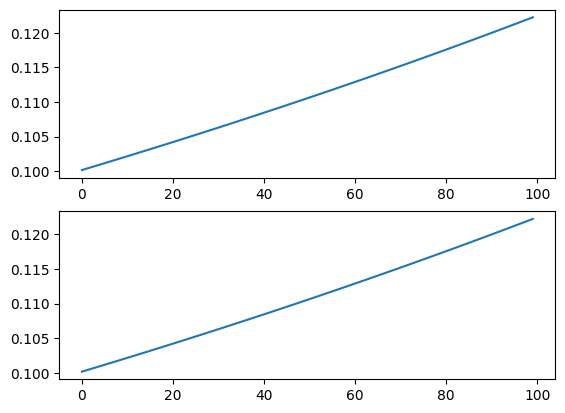

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_weight_value(cortex, ax1, presynaptic_neuron_id=0)
plot_weight_value(cortex, ax2, presynaptic_neuron_id=2)

## Monocular Deprivation

In [5]:
bsnn.add_input(
    data0=(np.ones((n_sensory, 1)) * light_strength).flatten(),
    data1=np.zeros((n_sensory, 1)).flatten(),
)

recording = bsnn.dynamic(time, learning_rate=learning_rate, is_record=True)
sensory, cortex, motor = record_splitter(recording, "bisensory")

<Axes: >

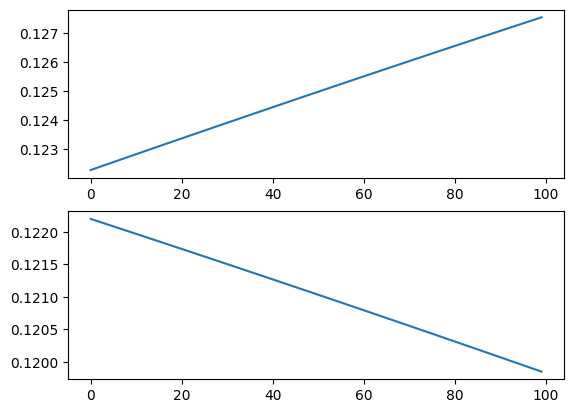

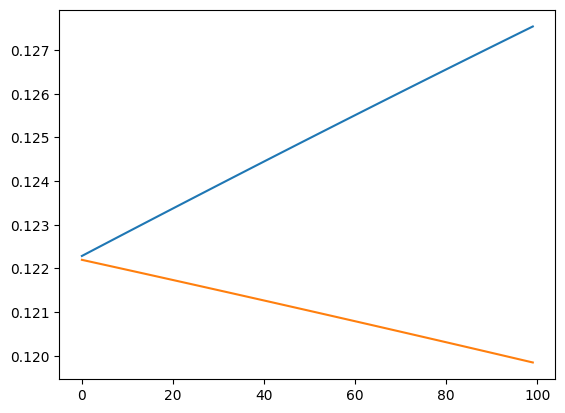

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_weight_value(cortex, ax1, presynaptic_neuron_id=0)
plot_weight_value(cortex, ax2, presynaptic_neuron_id=2)

fig, ax = plt.subplots()
plot_weight_value(cortex, ax, presynaptic_neuron_id=0)
plot_weight_value(cortex, ax, presynaptic_neuron_id=2)

## Binocular Deprivation

In [7]:
bsnn.add_input(
    data0=np.zeros((n_sensory, 1)).flatten(),
    data1=np.zeros((n_sensory, 1)).flatten(),
)

recording = bsnn.dynamic(time, learning_rate=learning_rate, is_record=True)
sensory, cortex, motor = record_splitter(recording, "bisensory")

<Axes: >

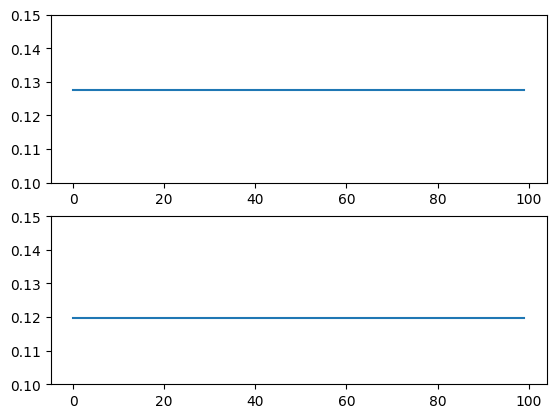

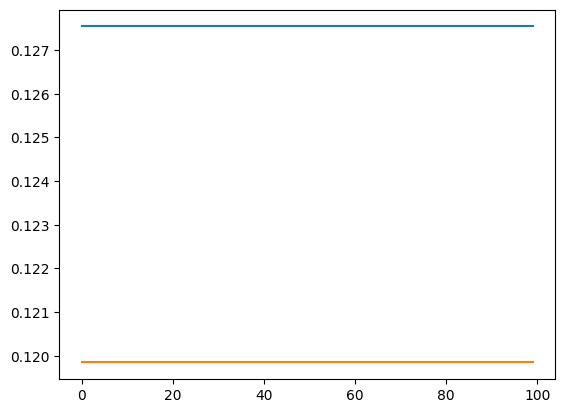

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_weight_value(cortex, ax1, presynaptic_neuron_id=0)
plot_weight_value(cortex, ax2, presynaptic_neuron_id=2)
ax1.set_ylim([0.1, 0.15])
ax2.set_ylim([0.1, 0.15])


fig, ax = plt.subplots()
plot_weight_value(cortex, ax, presynaptic_neuron_id=0)
plot_weight_value(cortex, ax, presynaptic_neuron_id=2)

## Reverse suture

In [9]:
time = 150

In [10]:
bsnn.add_input(
    data0=np.zeros((n_sensory, 1)).flatten(),
    data1=(np.ones((n_sensory, 1)) * light_strength).flatten(),
)

recording = bsnn.dynamic(time, learning_rate=learning_rate, is_record=True)
sensory, cortex, motor = record_splitter(recording, "bisensory")

<Axes: >

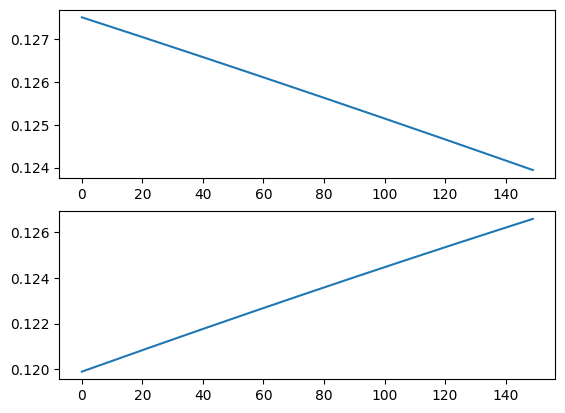

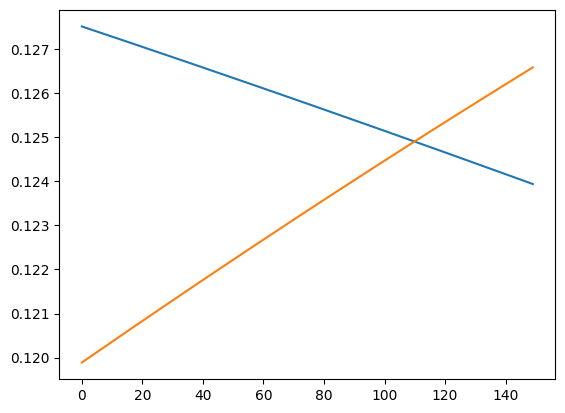

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_weight_value(cortex, ax1, presynaptic_neuron_id=0)
plot_weight_value(cortex, ax2, presynaptic_neuron_id=2)


fig, ax = plt.subplots()
plot_weight_value(cortex, ax, presynaptic_neuron_id=0)
plot_weight_value(cortex, ax, presynaptic_neuron_id=2)

## Binocular Recovery

In [12]:
bsnn.add_input(
    data0=(np.ones((n_sensory, 1)) * light_strength).flatten(),
    data1=(np.ones((n_sensory, 1)) * light_strength).flatten(),
)

recording = bsnn.dynamic(time, learning_rate=learning_rate, is_record=True)
sensory, cortex, motor = record_splitter(recording, "bisensory")

<Axes: >

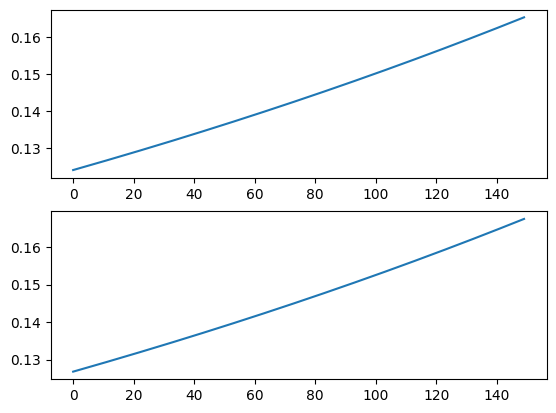

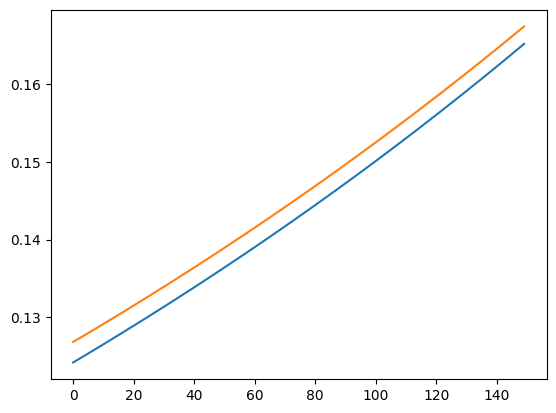

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_weight_value(cortex, ax1, presynaptic_neuron_id=0)
plot_weight_value(cortex, ax2, presynaptic_neuron_id=2)


fig, ax = plt.subplots()
plot_weight_value(cortex, ax, presynaptic_neuron_id=0)
plot_weight_value(cortex, ax, presynaptic_neuron_id=2)